In [ ]:
!pip install emoji -q
!pip install scikit-learn==1.0.1

In [ ]:
import pandas as pd
import numpy as np

import json
import string
import re
import functools
import operator
from joblib import dump, load

import emoji

from nltk import word_tokenize, sent_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Dashboard

## Prepare data

In [ ]:
# load complete data raw
# df = pd.read_csv("/content/drive/MyDrive/DSI Jateng/DKK Semarang/data/data_complete_masked.csv")
# df.head()

In [ ]:
# df['data_type'].value_counts()

In [ ]:
# drop duplicated data
# df = df.drop_duplicates(subset=['text']).reset_index(drop=True)
# df.shape

In [ ]:
# check the number of data type
# df['data_type'].value_counts()

In [ ]:
# PATH_EMOJI_CSV = '/content/drive/MyDrive/DSI Jateng/DKK Semarang/data/emoji_to_text.csv'
# PATH_KAMUS_ALAY = '/content/drive/MyDrive/DSI Jateng/DKK Semarang/data/kamus_alay.json'
# PATH_STOP_WORDS = '/content/drive/MyDrive/DSI Jateng/DKK Semarang/data/stop_words.txt'

In [ ]:
# # CLEANSING
# def cleansing(data):
#     # lowercasing
#     data = data.lower()
#     # remove punctuation
#     punct = string.punctuation
#     translator = str.maketrans(punct, ' '*len(punct))
#     data = data.translate(translator)
#     # remove newline
#     data = data.replace('\n', ' ')
#     # remove digit
#     pattern = r'[0-9]'
#     data = re.sub(pattern, '', data)
#     # remove extra space
#     data = ' '.join(data.split())
#     return data

# # CONVERT EMOJIS
# df_emoji = pd.read_csv(PATH_EMOJI_CSV)
# UNICODE_EMO = {row['emoji']:row['makna'] for idx,row in df_emoji.iterrows()}
# def convert_emojis(text):
#     # split emojis
#     em_split_emoji = emoji.get_emoji_regexp().split(text)
#     em_split_whitespace = [substr.split() for substr in em_split_emoji]
#     em_split = functools.reduce(operator.concat, em_split_whitespace)
#     text = ' '.join(em_split)
#     # convert emojis
#     for emot in UNICODE_EMO:
#         text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
#     return text.lower()

# # NORMALIZE COLLOQUIAL/ALAY
# kamus_alay = json.load(open(PATH_KAMUS_ALAY, 'r'))
# def normalize_text(data):
#   word_tokens = word_tokenize(data)
#   result = [kamus_alay.get(w,w) for w in word_tokens]
#   return ' '.join(result)

# # REMOVE STOPWORDS
# stop_words = [sw.strip() for sw in open(PATH_STOP_WORDS, 'r').readlines()]
# def remove_stopword(text, stop_words=stop_words):
#     word_tokens = word_tokenize(text)
#     filtered_sentence = [w for w in word_tokens if not w in stop_words]
#     return ' '.join(filtered_sentence)

In [ ]:
# # PREPROCESS PIPELINE
# def preprocess(text):
#     text = cleansing(text)
#     text = convert_emojis(text)
#     text = normalize_text(text)
#     text = remove_stopword(text)
#     return text

In [ ]:
# %%time
# df['text'] = df['text'].apply(lambda x: preprocess(x))

In [ ]:
# dropna
# df = df.dropna(subset=['text']).reset_index(drop=True)
# df.shape

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/DSI Jateng/DKK Semarang/data/data_complete_masked_preprocessed.csv")
# df.head()

In [ ]:
# df.shape

In [ ]:
# df['data_type'].value_counts()

## Predict sentiment for data inference

In [ ]:
# # load tf-idf vectorizer model
# vectorizer = load('/content/drive/MyDrive/DSI Jateng/DKK Semarang/models/tfidf-vectorizer.joblib')

# # select text features from data inference
# text_inf = df[df.data_type == 'inference']['text']
# features = vectorizer.transform(text_inf)

# # load model tf-idf svc tuned
# svc = load('/content/drive/MyDrive/DSI Jateng/DKK Semarang/models/tfidf_svc.joblib')

# # predict
# label_inf = svc.predict(features)

# # mapping predict result to string
# mapper = {0:'neutral', 1:'positive', 2:'negative' }
# label_inf = pd.Series(label_inf).map(mapper)

# # assign the result to df
# label_dev = df[df.data_type == 'development']['label']
# label = list(label_dev) + list(label_inf)
# df['label'] = label

In [ ]:
# df['label'].value_counts()

In [ ]:
# df.info()

In [ ]:
# df.to_csv('data_complete_visualization.csv', index=False)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DSI Jateng/DKK Semarang/data/data_complete_visualization.csv")
df.shape

(24351, 6)

In [ ]:
df.head()

,text,label,username,likes,datetime,data_type
0,ijin share,positive,username,0,2020-03-03,development
1,perlune cuci tangan mbing santai wae,neutral,username,1,2020-03-03,development
2,pegawai puskesmas,neutral,username,0,2020-03-06,development
3,pegawai rs pendaftaran wajib memakai masker,neutral,username,0,2020-03-06,development
4,tangan terima kasih inpo cuci tangana tangan_t...,positive,username,0,2020-03-11,development


In [ ]:
dev = df[df.data_type == 'development']
dev['label'].value_counts()

negative    3345
neutral     3127
positive    2620
Name: label, dtype: int64

## Wordcloud

In [ ]:
# FILTER DATA BASED ON THE DATA TYPE
data_type = "development"
df_filter = df[df.data_type == data_type]

df_filter.head()

,text,label,username,likes,datetime,data_type
0,ijin share,positive,username,0,2020-03-03,development
1,perlune cuci tangan mbing santai wae,neutral,username,1,2020-03-03,development
2,pegawai puskesmas,neutral,username,0,2020-03-06,development
3,pegawai rs pendaftaran wajib memakai masker,neutral,username,0,2020-03-06,development
4,tangan terima kasih inpo cuci tangana tangan_t...,positive,username,0,2020-03-11,development


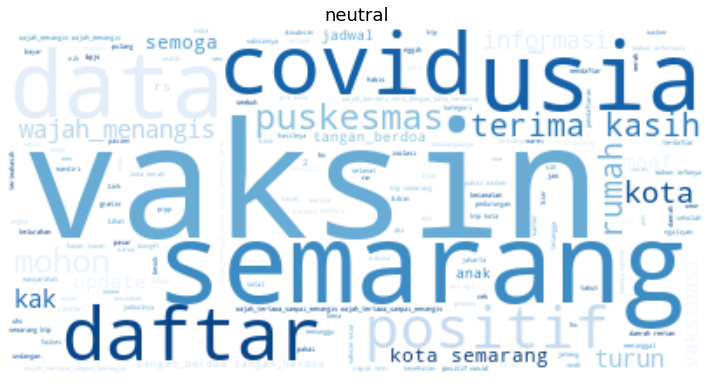

In [ ]:
# neutral comments before preprocessing
neutral = df_filter[df_filter['label'] == 'neutral']

comment_words = ''
# iterate through the csv file
for val in neutral['text']:
    # typecaste each val to string
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] =  re.sub(r'[^\x00-\x7F]+',' ', tokens[i])
        tokens[i] = tokens[i].strip()
    comment_words += " ".join(tokens)+" "

# all_text = ' '.join(word for word in neutral['text'])
wordcloud = WordCloud(colormap='Blues', 
                      mode='RGBA',
                      max_words=200,
                      background_color='white')
wordcloud.generate(comment_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("neutral",fontsize=18)
plt.tight_layout()
# plt.margins(x=0, y=0)
plt.show()

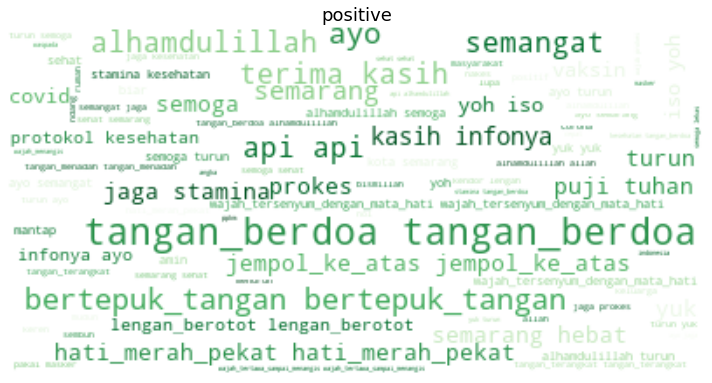

In [ ]:
# neutral comments before preprocessing
positive = df[df['label'] == 'positive']

comment_words = ''
# iterate through the csv file
for val in positive['text']:
    # typecaste each val to string
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] =  re.sub(r'[^\x00-\x7F]+',' ', tokens[i])
        tokens[i] = tokens[i].strip()
    comment_words += " ".join(tokens)+" "

# all_text = ' '.join(word for word in neutral['text'])
wordcloud = WordCloud(colormap='Greens', 
                      mode='RGBA',
                      max_words=200,
                      background_color='white')
wordcloud.generate(comment_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("positive",fontsize=18)
plt.tight_layout()
# plt.margins(x=0, y=0)
plt.show()

## Top 10 words

In [ ]:
from collections import Counter

temp = Counter(comment_words.split())
top10 = temp.most_common(10)
df = pd.DataFrame(top10, columns=['word','freq'])
df = df.sort_values(by='freq', ascending=True)
df

,word,freq
9,prokes,615
8,semangat,769
7,api,795
6,bertepuk_tangan,932
5,alhamdulillah,980
4,turun,1004
3,semoga,1061
2,semarang,1095
1,ayo,1125
0,tangan_berdoa,1579


In [ ]:
fig = px.bar(df, x="freq", y="word", orientation='h', height=400)
fig.update_layout(title_text='Top 10 words sentiment positive', 
                  plot_bgcolor='rgb(275, 270, 273)')
fig.update_traces(marker_color='lightgreen')

# Set x-axes and y-axes titles
fig.update_yaxes(title_text="")
fig.update_xaxes(title_text="frequency")
fig.show()